# Visuals and Arts 1

In this session, we will learn about the grammar of graphs that Leland Wilkinson introduced in the book Grammar of Graphics, Springer, New York, 2005. We will follow roughly the tutorial at http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html, although the tutorial has many more examples and graphs than we will work with. But we will focus on a historical analysis and use the data and some examples from the excellent http://benschmidt.org/Crewlists. I highly recommend reading both as complementary material to this session. Later in the session we will apply our knowledge to data from museums.

The grammar of graphs defines independent building blocks for the things we want to do with graphs. Through their combination, the blocks give us any number of possible combinations to create perfect visualisations.


In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
crews = pd.read_csv("data/crews-sample.csv", parse_dates=['date'])

In [4]:
crews.head()

,Unnamed: 0,X,LastName,FirstName,Vessel,Rig,ApproximateDeparture,FullName,Age,Height,...,Hair,Eye,Residence,Rank,Lay.,Remarks,Voyage.number,VesselNumber,date,height
0,33017,33017,Van Dusen,Theodore,Chandler Price,Ship,7/24/1851,Theodore Van Dusen,NaN,NaN,...,NaN,NaN,NaN,Greenhand,1-200,NaN,2553,116.0,NaT,NaN
1,29230,29230,Chadwick,Willard F.,Helen Mar,Bark,7/5/1876,"Chadwick, Willard F.",24.0,6'0,...,Auburn,NaN,"Sandwich, Ma",NaN,NaN,NaN,6339,290.0,1876-05-07,72.0
2,114641,114641,Adams,Lemuel D.,Tropic Bird,Bark,1/2/1864,"Adams, Lemuel D.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14132,658.0,1864-02-01,NaN
3,65638,65638,Sensenback,John,Minerva II,Bark,5/15/1860,"Sensenback, John",22.0,NaN,...,Light,NaN,"Lehigh, Pa",NaN,NaN,NaN,9899,424.0,NaT,NaN
4,7767,7767,Manater,Sanderson,Amazon,Ship,9/20/1828,Sanderson Manater,23.0,NaN,...,Light Brown,NaN,"Tisbury, Ma",NaN,NaN,NaN,745,853.0,NaT,NaN


You can use the function value_counts() on a specific column to see how often each of its value occurs, we do this here for the Age column, to explore the Height of the whalers as follows:

In [5]:
crews['Height'].value_counts()

5'8         1480
5'7         1472
5'6         1383
5'9          909
5'5          829
            ... 
5'5t 1/4       1
5' 11          1
5'7 1/2l       1
5'10.75        1
5'8.125        1
Name: Height, Length: 221, dtype: int64

We remove the NaNs from this column first to make sure everything in the column can be used in the plot by using the function dropna() on the height column

In [6]:
crews['Height'] = crews['height'].dropna()

Now we print the height value counts again

In [7]:
crews['Height'].value_counts()

68.000    1535
67.000    1523
66.000    1442
69.000     956
65.000     868
          ... 
44.000       1
50.000       1
72.625       1
65.125       1
50.500       1
Name: Height, Length: 102, dtype: int64

And we plot the distribution by using matplotlib

<AxesSubplot:>

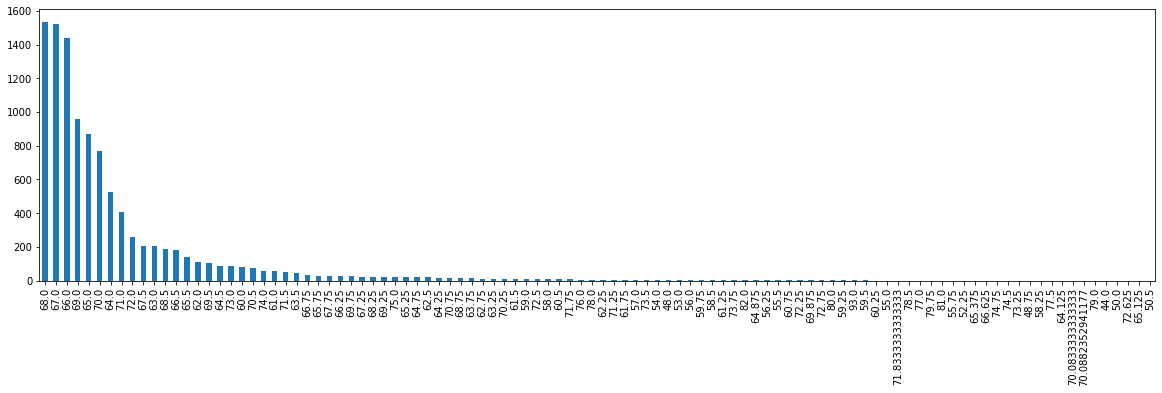

In [8]:
crews['Height'].value_counts().plot(kind='bar', figsize=(20,5))

Now we use the seaborn package to create a similar barplot, these barplots are used to explore a single value and its frequency. Let's also do this for the Age column.

We use histplot(), since it gives a more clearer overview

<AxesSubplot:xlabel='Height', ylabel='Count'>

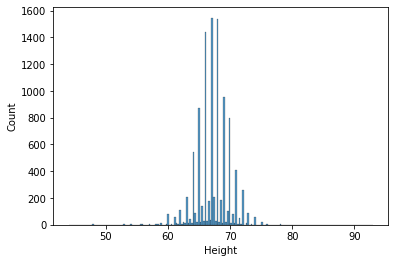

In [9]:
# Something about how seaborn works?
sns.histplot(data=crews, x='Height')

<AxesSubplot:xlabel='Age', ylabel='Count'>

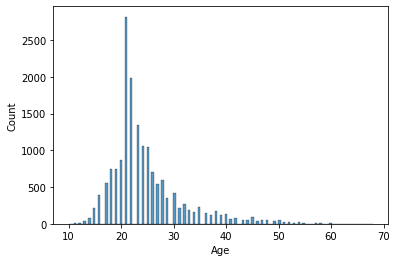

In [10]:
sns.histplot(data=crews, x='Age')

We often want to compare, however, the relative distribution of 2 or more variables. So, for instance, we are interested in the relationship between  and date of the whalers’ journey. Maybe, this shows that people get taller over time? Or maybe not. Let’s try. 
Height:date

In [11]:
crews.head()

,Unnamed: 0,X,LastName,FirstName,Vessel,Rig,ApproximateDeparture,FullName,Age,Height,...,Hair,Eye,Residence,Rank,Lay.,Remarks,Voyage.number,VesselNumber,date,height
0,33017,33017,Van Dusen,Theodore,Chandler Price,Ship,7/24/1851,Theodore Van Dusen,NaN,NaN,...,NaN,NaN,NaN,Greenhand,1-200,NaN,2553,116.0,NaT,NaN
1,29230,29230,Chadwick,Willard F.,Helen Mar,Bark,7/5/1876,"Chadwick, Willard F.",24.0,72.0,...,Auburn,NaN,"Sandwich, Ma",NaN,NaN,NaN,6339,290.0,1876-05-07,72.0
2,114641,114641,Adams,Lemuel D.,Tropic Bird,Bark,1/2/1864,"Adams, Lemuel D.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14132,658.0,1864-02-01,NaN
3,65638,65638,Sensenback,John,Minerva II,Bark,5/15/1860,"Sensenback, John",22.0,NaN,...,Light,NaN,"Lehigh, Pa",NaN,NaN,NaN,9899,424.0,NaT,NaN
4,7767,7767,Manater,Sanderson,Amazon,Ship,9/20/1828,Sanderson Manater,23.0,NaN,...,Light Brown,NaN,"Tisbury, Ma",NaN,NaN,NaN,745,853.0,NaT,NaN


<AxesSubplot:xlabel='date', ylabel='Height'>

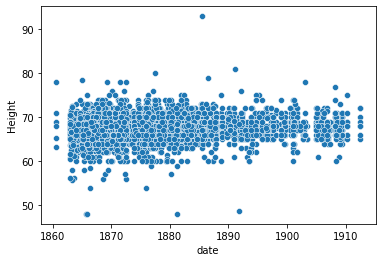

In [12]:
scatter = sns.scatterplot(data=crews,x='date', y='Height')
scatter

We have not really got an answer to the question whether people become taller, as the plot contains too many points. The graph shows how difficult it is to plot even this fairly small real world dataset. Do you remember our brief discussion of ‘bad data’ in an earlier session? There seem to be some suspicious outliers of very tall or very small whalers - height is in feet btw. If points in a scatterplot are so close, there will be various options to correct this. 

The easiest is to change the aesthetics to make the points more transparent using the alpha parameter. Furthermore, we would like to change the colour of the points in the next plot.

<AxesSubplot:xlabel='date', ylabel='Height'>

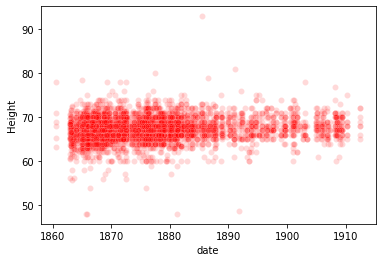

In [13]:
scatter = sns.scatterplot(data=crews,x='date', y='Height', alpha=0.15, color='red')
scatter

Our plot of crews shows many data points and significant overlap. Under these conditions, scatterplots become less useful. We have changed the alpha parameter to make the points more visible. Another approch is to bin the points into hexagonal cells, which is less complicated than it sounds. Run the same scatter plot command as above to retrieve the whalers’ height but use jointplot insteaad of scatterplot and add kind='hex' at the end. Much better, no? 

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

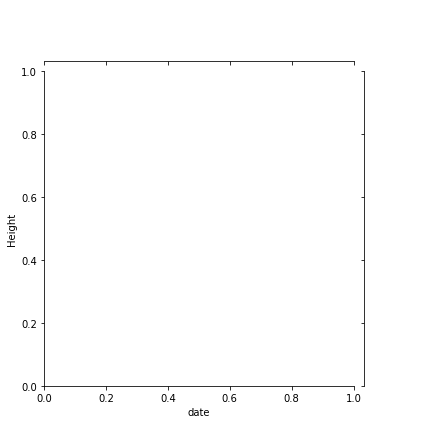

In [15]:
scatter = sns.jointplot(data=crews,x='date', y='Height', alpha=0.15, color='red', kind='hex')
scatter

This time, we want the colour of the points to depend on the type of Rig.

<AxesSubplot:xlabel='date', ylabel='Height'>

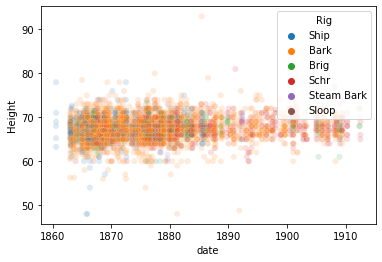

In [16]:
scatter = sns.scatterplot(data=crews,x='date', y='Height', alpha=0.15, color='red', hue='Rig')
scatter


However, we still do not have a clear idea od the relationship of the whalers’ height and the date of the journey. Let us add a simple smoother ... that includes a regression line, which measures the degree of relatedness between two continuous variables (here date of journey and height), and a ribbon to measure the degree of confidence we have in the relationship.

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

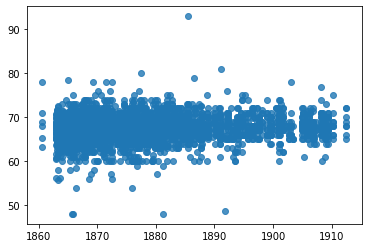

In [17]:
scatter = sns.regplot(data=crews,x='date', y='Height')
scatter

Well we cannot really see the regression line here, so let's change the colors and make the points more transparent again

<AxesSubplot:xlabel='date', ylabel='Height'>

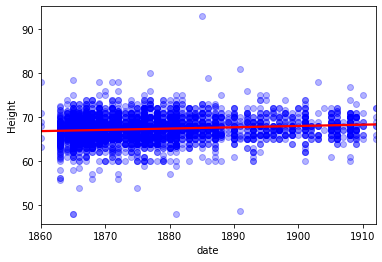

In [18]:
scatter = sns.regplot(data=crews,x='date', y='Height', scatter_kws={'color': 'blue', 'alpha':0.3}, line_kws={"color": "red"})
scatter

There is a nice blue regression line in the graph now, which is fairly constant in terms of the height per year. There is a slight increase but nothing to really support our hypothesis. Most likely, our data is not big enough to come to a conclusion. We could try the same experiment with the whole dataset next, but for now we move on.
For completeness, we continue by introducing a few more ..., let's try and show the skin color in the plot as well, by using these as colors and the Rigs as shapes of the points. 

<AxesSubplot:xlabel='date', ylabel='Height'>

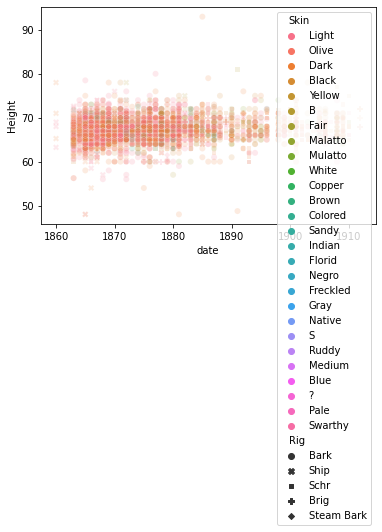

In [19]:
scatter = sns.scatterplot(data=crews,x='date', y='Height', alpha=0.15, color='red', style='Rig', hue='Skin')
scatter

Oh well, the graph is not as useful as hoped. There are simply too many points and in particular skin colours. Maybe, it would have been better to use test data than real life data, but at least you should get a feeling of the challenges we face with social and cultural data. In the real life of data, you often try, fail and try again until you get something nice. 

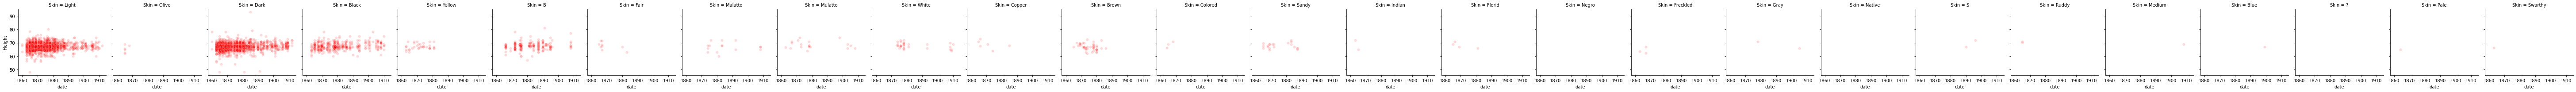

In [20]:
g = sns.FacetGrid(crews, col="Skin")
g.map(sns.scatterplot,'date','Height', alpha=0.15, color='red')
plt.show()

If you zoom in to the new graph, you will notice some differences in terms of the height but also of the dates when whalers of particular skin types were recorded. But overall the graph is still very complicated, and it is not easy to draw any conclusion from it.

Overall, however, http://benschmidt.org/Crewlists had a better idea by trying to analyse the relationship of age and height of whalers. As an exercise, let us start from the beginning ...

<AxesSubplot:xlabel='Age', ylabel='Height'>

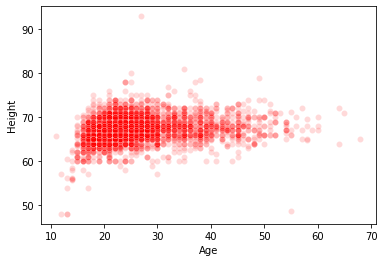

In [21]:
scatter = sns.scatterplot(data=crews,x='Age', y='Height', color='red', alpha=0.15)
scatter

Ok, there seems to be a real relationship between age and height. But again, many values are missing. We do not like this and hence define a new data frame that contains only full age and height records by removing the NaN values for Age as we have done before for Height and date

In [22]:
crews = crews.dropna(subset=['Age', 'Height'])

<AxesSubplot:xlabel='Age', ylabel='Height'>

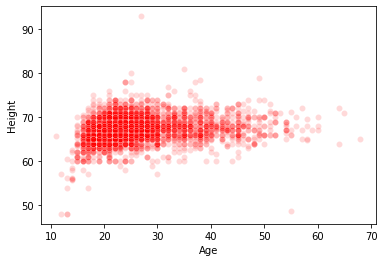

In [23]:
scatter = sns.scatterplot(data=crews,x='Age', y='Height', color='red', alpha=0.15)
scatter

Next we would like to add a regression line to see whether our hypothesis about the relationship of the variables is right. 

Let's try it ourselves by using predict, python doesn't have a simple function for that (only through scikit learn for example)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = crews['Age'].to_numpy()
X = X1.astype(int)
X = X.reshape((-1,1))


y = crews['Height'].to_numpy()
y= y.astype(int)
print(X,y)
model.fit(X, y)

[[24]
 [16]
 [16]
 ...
 [22]
 [22]
 [21]] [72 69 67 ... 69 67 66]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred = model.predict(X)
print(y_pred)

[68 66 66 ... 68 68 66]


It shows that height increases with age, although the approximation is not great, as people do not really get taller beyond a certain age. Nevertheless, congratulations are in order. You have proven that whalers get taller when they become older.

<AxesSubplot:xlabel='Age', ylabel='Height'>

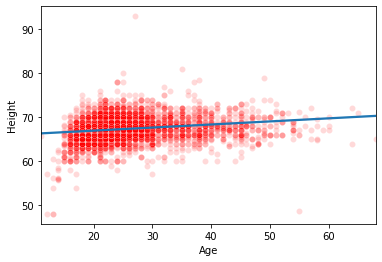

In [35]:
sns.scatterplot(data=crews,x='Age', y='Height', color='red', alpha=0.15)
sns.regplot(x=X, y=y_pred, scatter=False)

Now to something hopefully altogether more exciting to deal with. We move on from whaling cultures to museums and your future job as an analyst there. Several arts museums around the world publish their collections’ metadata online. Very popular is, for instance, New York’s Museum of Modern Art (MoMA) collection data (https://github.com/MuseumofModernArt/collection). Let us take a look at their artworks’ information. Please note that this data is refreshed monthly and fairly large with over 50 MB at the time of writing. So, if you download it now you might see some differences to the preloaded data frame moma_artworks. Check out a small sample of all the records with summary(moma_artworks).

In [36]:
moma_art = pd.read_csv("data/moma-artworks-sample.csv")

Type in head(moma_artworks) to take a look at the first rows. For the rest of the MoMA exercises, we take inspiration from http://sebastianbarfort.github.io/sds/posts/2015/09/27/assignment-1.html.

In [37]:
moma_art.head()

,Unnamed: 0,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,...,ThumbnailURL,Circumference..cm.,Depth..cm.,Diameter..cm.,Height..cm.,Length..cm.,Weight..kg.,Width..cm.,Seat.Height..cm.,Duration..sec..
0,110086,Untitled from Flare,Thomas Nozkowski,4344,"(American, born 1944)",(American),(1944),(0),(Male),2009,...,NaN,NaN,NaN,NaN,21.5000,NaN,NaN,32.5000,NaN,NaN
1,95761,I Am Still Alive,On Kawara,3030,"(Japanese, 1933–2014)",(Japanese),(1933),(0),(Male),1970,...,NaN,NaN,NaN,NaN,19.1000,NaN,NaN,20.9000,NaN,NaN
2,90344,Ortogonal (Collage) 8,Alejandro Otero,4445,"(Venezuelan, 1921–1990)",(Venezuelan),(1921),(1990),(Male),1952,...,NaN,NaN,NaN,NaN,32.3851,NaN,NaN,32.3851,NaN,NaN
3,13738,Plate (folio 12) from (POEMS),Willem de Kooning,3213,"(American, born the Netherlands. 1904–1997)",(American),(1904),(1997),(Male),1967-1988,...,NaN,NaN,NaN,NaN,35.2000,NaN,NaN,27.8000,NaN,NaN
4,41430,"Mansard House, South End, Boston, Massachusetts",Walker Evans,1777,"(American, 1903–1975)",(American),(1903),(1975),(Male),1932,...,NaN,NaN,NaN,NaN,16.0000,NaN,NaN,11.3000,NaN,NaN


In this part, let’s pretend you work for MoMA, and your manager has asked you to create a visualisation showcasing the development of the museum stock. Next to the moma_artworks, I have also created the moma_stock data frame. We would like to know how the stock has developed in recent years and visualise it. Get the head of moma_stock.

In [41]:
moma_stock = pd.read_csv("data/moma-stock.csv", parse_dates=['date'])

In [42]:
moma_stock.head()

,Unnamed: 0,date,supply,stock
0,1,1929-11-01,9,9
1,2,1930-01-01,3,12
2,3,1930-04-01,2,14
3,4,1930-06-01,1,15
4,5,1930-10-01,2,17


Next, we draw a simple red line to represent the stock development

<AxesSubplot:xlabel='date', ylabel='stock'>

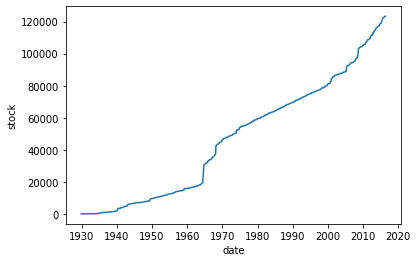

In [43]:
sns.lineplot(data=moma_stock, x='date', y='stock')

There is a definite jump in holdings from the late 1960s onwards. Or is this simply a recording issue? We cannot know really and would have to do further research. Let’s investigate the development of MoMA departments next. moma_departments contains the stocks per department. Check it out with head()

In [54]:
moma_dep = pd.read_csv("data/moma-departments.csv", parse_dates=['date'])
moma_dep.head()

,Unnamed: 0,date,Department,supply,stock
0,1,1932-01-01,Architecture & Design,2,2
1,2,1934-01-01,Architecture & Design,2,4
2,3,1934-04-01,Architecture & Design,43,47
3,4,1934-09-01,Architecture & Design,4,51
4,5,1935-11-01,Architecture & Design,22,73


Let's plot the development of the stock of each department by setting a different color for each department by using hue='Department', just as we did with the whalers' Rig.

<AxesSubplot:xlabel='date', ylabel='stock'>

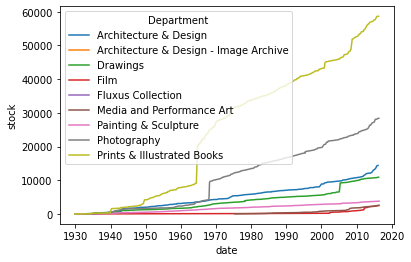

In [58]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')

Well done! But you are rather nervous about showing this to your manager, the legend is covering most of the view of the plot which makes it a bit messy, and would like to change the look and feel a bit.

Seaborn has five built-in themes to style its plots: darkgrid, whitegrid, dark, white, and ticks. Seaborn defaults to using the darkgrid theme for its plots, but you can change this styling to better suit your presentation needs.

To use any of the preset themes pass the name of it to sns.set_style().
(https://www.codecademy.com/articles/seaborn-design-i)

However, these do not include the possibility to change the background color, for this we need to use the built-in styles of matplotlib, plt.style.use()

Let's try and change the background colour first.


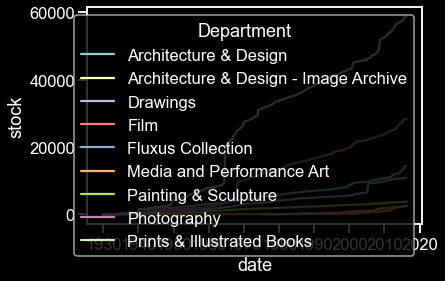

In [72]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.style.use("dark_background")


It's black, but the position of the legend seems to be even worse now,
luckily we can also change this using matplotlib's plt.legend(), where we use the argument bbox_to_anchor=(1.01, 1) to tell it the coordinates of where the legend needs to go.

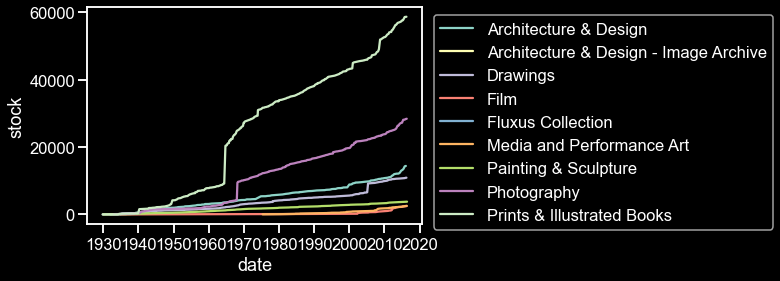

In [82]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.style.use("dark_background")
plt.legend(bbox_to_anchor=(1.01, 1))

Hmm it still doesn't look completely right, the size of the labels on the x-axis seem a little bit too big, let's change this as well using matplotlib's tick_params(labelsize=)


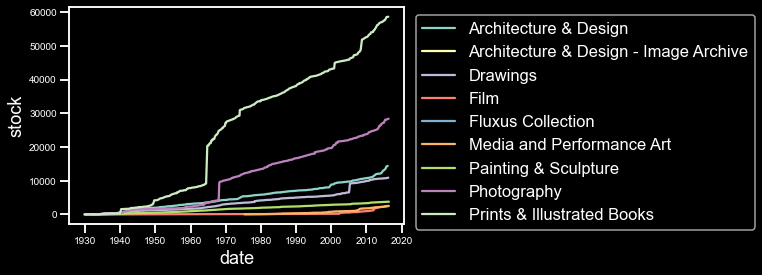

In [83]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.style.use("dark_background")
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tick_params(labelsize=10)

Your manager likes it! After your success at MoMA why not start at the TATE Galleries in Britain? Your first task is to compare visitor numbers. You have been given a data frame tate_attendance. Check it out with 

In [88]:
tate_vis = pd.read_csv("data/tate-visitors.csv")

In [94]:
tate_vis

,year,Britain,Modern,Liverpool,StIves
0,2004,"108,577","512,807","66,815","38,381"
1,2005,"83,305","328,504","81,898","36,242"
2,2006,"153,279","480,753","68,439","40,678"
3,2007,"129,129","485,799","84,524","40,678"
4,2008,"118,294","472,907","225,184","34,807"
5,2009,"103,531","470,642","78,012","37,214"
6,2010,"158,909","506,151","106,065","38,318"
7,2011,"142,615","466,231","81,553","38,501"
8,2012,"81,997","591,215","85,698","32,254"
9,2013,"163,845","424,556","79,755","41,494"


tate_vis obviously contains the visitor numbers since 2004 for all TATE Galleries in Britain. You are eager to plot it in order to compare visitor developments. But you soon realise that there is an issue with the format, which is quite typical in these cases. Some of the information (in this case the name of the galleries) is encoded in the titles of the columns. You would like to create a data frame that has the gallery names as a value in a column. This means you create ‘tidy data’, as defined by Hadley Wickham in the Journal of Statistical Software (https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf). In tidy data, each row is an observation and each column contains the values of a variable (i.e. an attribute of what we are observing). In python we can create these tidy dataframes using pandas' melt() function. With the argument id_vars to tell the function which column label to keep, all the others will be converted into column variables and values.

In [125]:
tidy_vis = pd.melt(tate_vis, id_vars='year', var_name='gallery', value_name='visitors')
tidy_vis


Success! Because the visitor numbers represent together the total number of visitors to the TATE Galleries in Britain, you would like to create a stacked area plot.
However to create a stacked area plot in python we actually need all the galleries in separate arrays in a nested one, so that we get y = [[Britain],[Modern],[Liverpool],[Stlves]]

In [129]:
Britain = [int(str.replace(item,',','')) for item in tate_vis['Britain'].tolist()]
Modern = [int(str.replace(item,',','')) for item in tate_vis['Modern'].tolist()]
Liverpool = [int(str.replace(item,',','')) for item in tate_vis['Liverpool'].tolist()]
StIves = [int(str.replace(item,',','')) for item in tate_vis['StIves'].tolist()]

y = [Britain,Modern,Liverpool,StIves]
y

[[108577,
  83305,
  153279,
  129129,
  118294,
  103531,
  158909,
  142615,
  81997,
  163845,
  116933,
  124208],
 [512807,
  328504,
  480753,
  485799,
  472907,
  470642,
  506151,
  466231,
  591215,
  424556,
  686413,
  444771],
 [66815,
  81898,
  68439,
  84524,
  225184,
  78012,
  106065,
  81553,
  85698,
  79755,
  64914,
  80716],
 [38381,
  36242,
  40678,
  40678,
  34807,
  37214,
  38318,
  38501,
  32254,
  41494,
  42241,
  37277]]

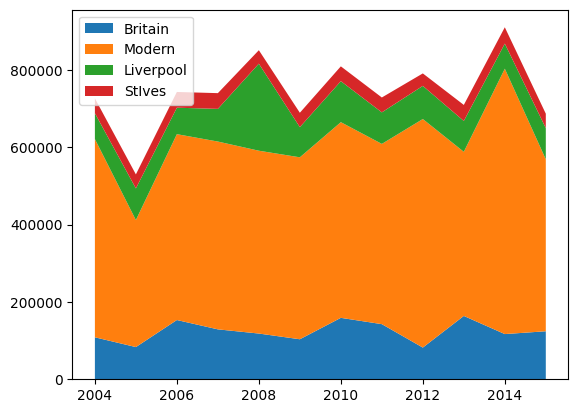

In [136]:
plt.style.use("default")
plt.stackplot(tate_vis['year'],y, labels=['Britain','Modern', 'Liverpool', 'StIves'])
plt.legend(loc='upper left')
plt.show()

What have we learned? Still have to put a quick summary here